In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('all_data.csv')

def draw_hist(column) :
    median = column.median()
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    plt.hist(column, bins=30, alpha=0.8)
    plt.axvline(median, color='orange', linestyle='dashed')
    plt.axvline(Q1, color='purple', linestyle='dashed')
    plt.axvline(Q3, color='purple', linestyle='dashed')

    plt.show()
    plt.clf()
    return [Q1, median, Q3]

def draw_boxplot (data, x, y) :
    plt.figure(figsize=(30, 20))
    sns.boxplot(data=data, x=x, y=y)
    plt.show()
    plt.clf()


def draw_lineplot_per_country(column) :
    list_of_countries = df.Country.value_counts().index
    for i in list_of_countries :
        country_data = df[df.Country == i]
        plt.plot(country_data.Year, country_data[column])

    plt.legend(list_of_countries)
    plt.show()
    plt.clf()
    
df.columns = ['Country', 'Year', 'LifeEx', 'GDP']
df.head()

,Country,Year,LifeEx,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# There are 4 variables in the dataset:
- Country : categorical
- Year : ordinal which represent the year that we are observing
- Life expectancy at birth : continious represent the life expectancy at the given year
- GDP : continious which is the GDP of the country at the given year

# Questions
- Descriptive analysis on GDP and LifeEx
- How does each country GDP compare to others ?
- How does the overall GDP evolve over time ?*
- How does each country GDP evolve over time ?
- Is a higher GDP correlate with higher LifeEx ?
- How does the overall LifeEx evolve over time ?*
- How is the difference in LifeEx per country ?
- How does each country LifeEx evolve over time ?

 # Descriptive analysis on GDP and LifeEx

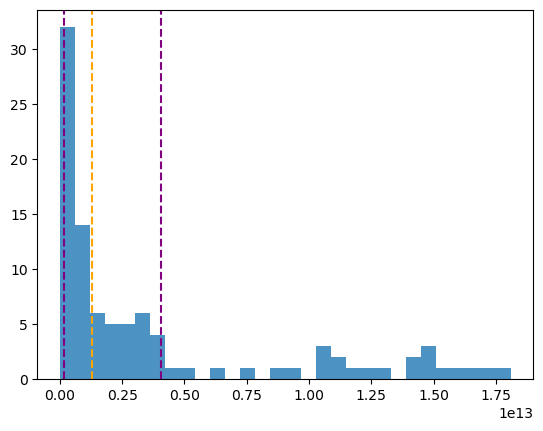

We see that the distribution is highly skewed on the right side with a median of 173301750000.0 = 1280.22 billion USD


<Figure size 640x480 with 0 Axes>

In [5]:
# GDP
GDP_median, GDP_Q1, GDP_Q3 = draw_hist(df.GDP)

print(f'We see that the distribution is highly skewed on the right side with a median of {GDP_median} = 1280.22 billion USD')

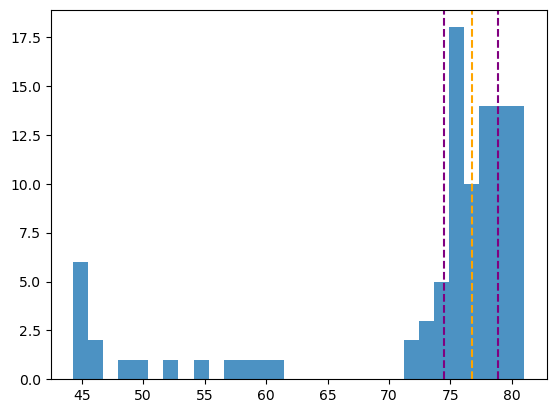

We see that the distribution is highly skewed on the left side with a median of 74.475 Years


<Figure size 640x480 with 0 Axes>

In [6]:
# LifeEx

LifeEx_median, LifeEx_Q1, LifeEx_Q3 = draw_hist(df.LifeEx)


print(f'We see that the distribution is highly skewed on the left side with a median of {LifeEx_median} Years')

# How does each country GDP compare to others ?

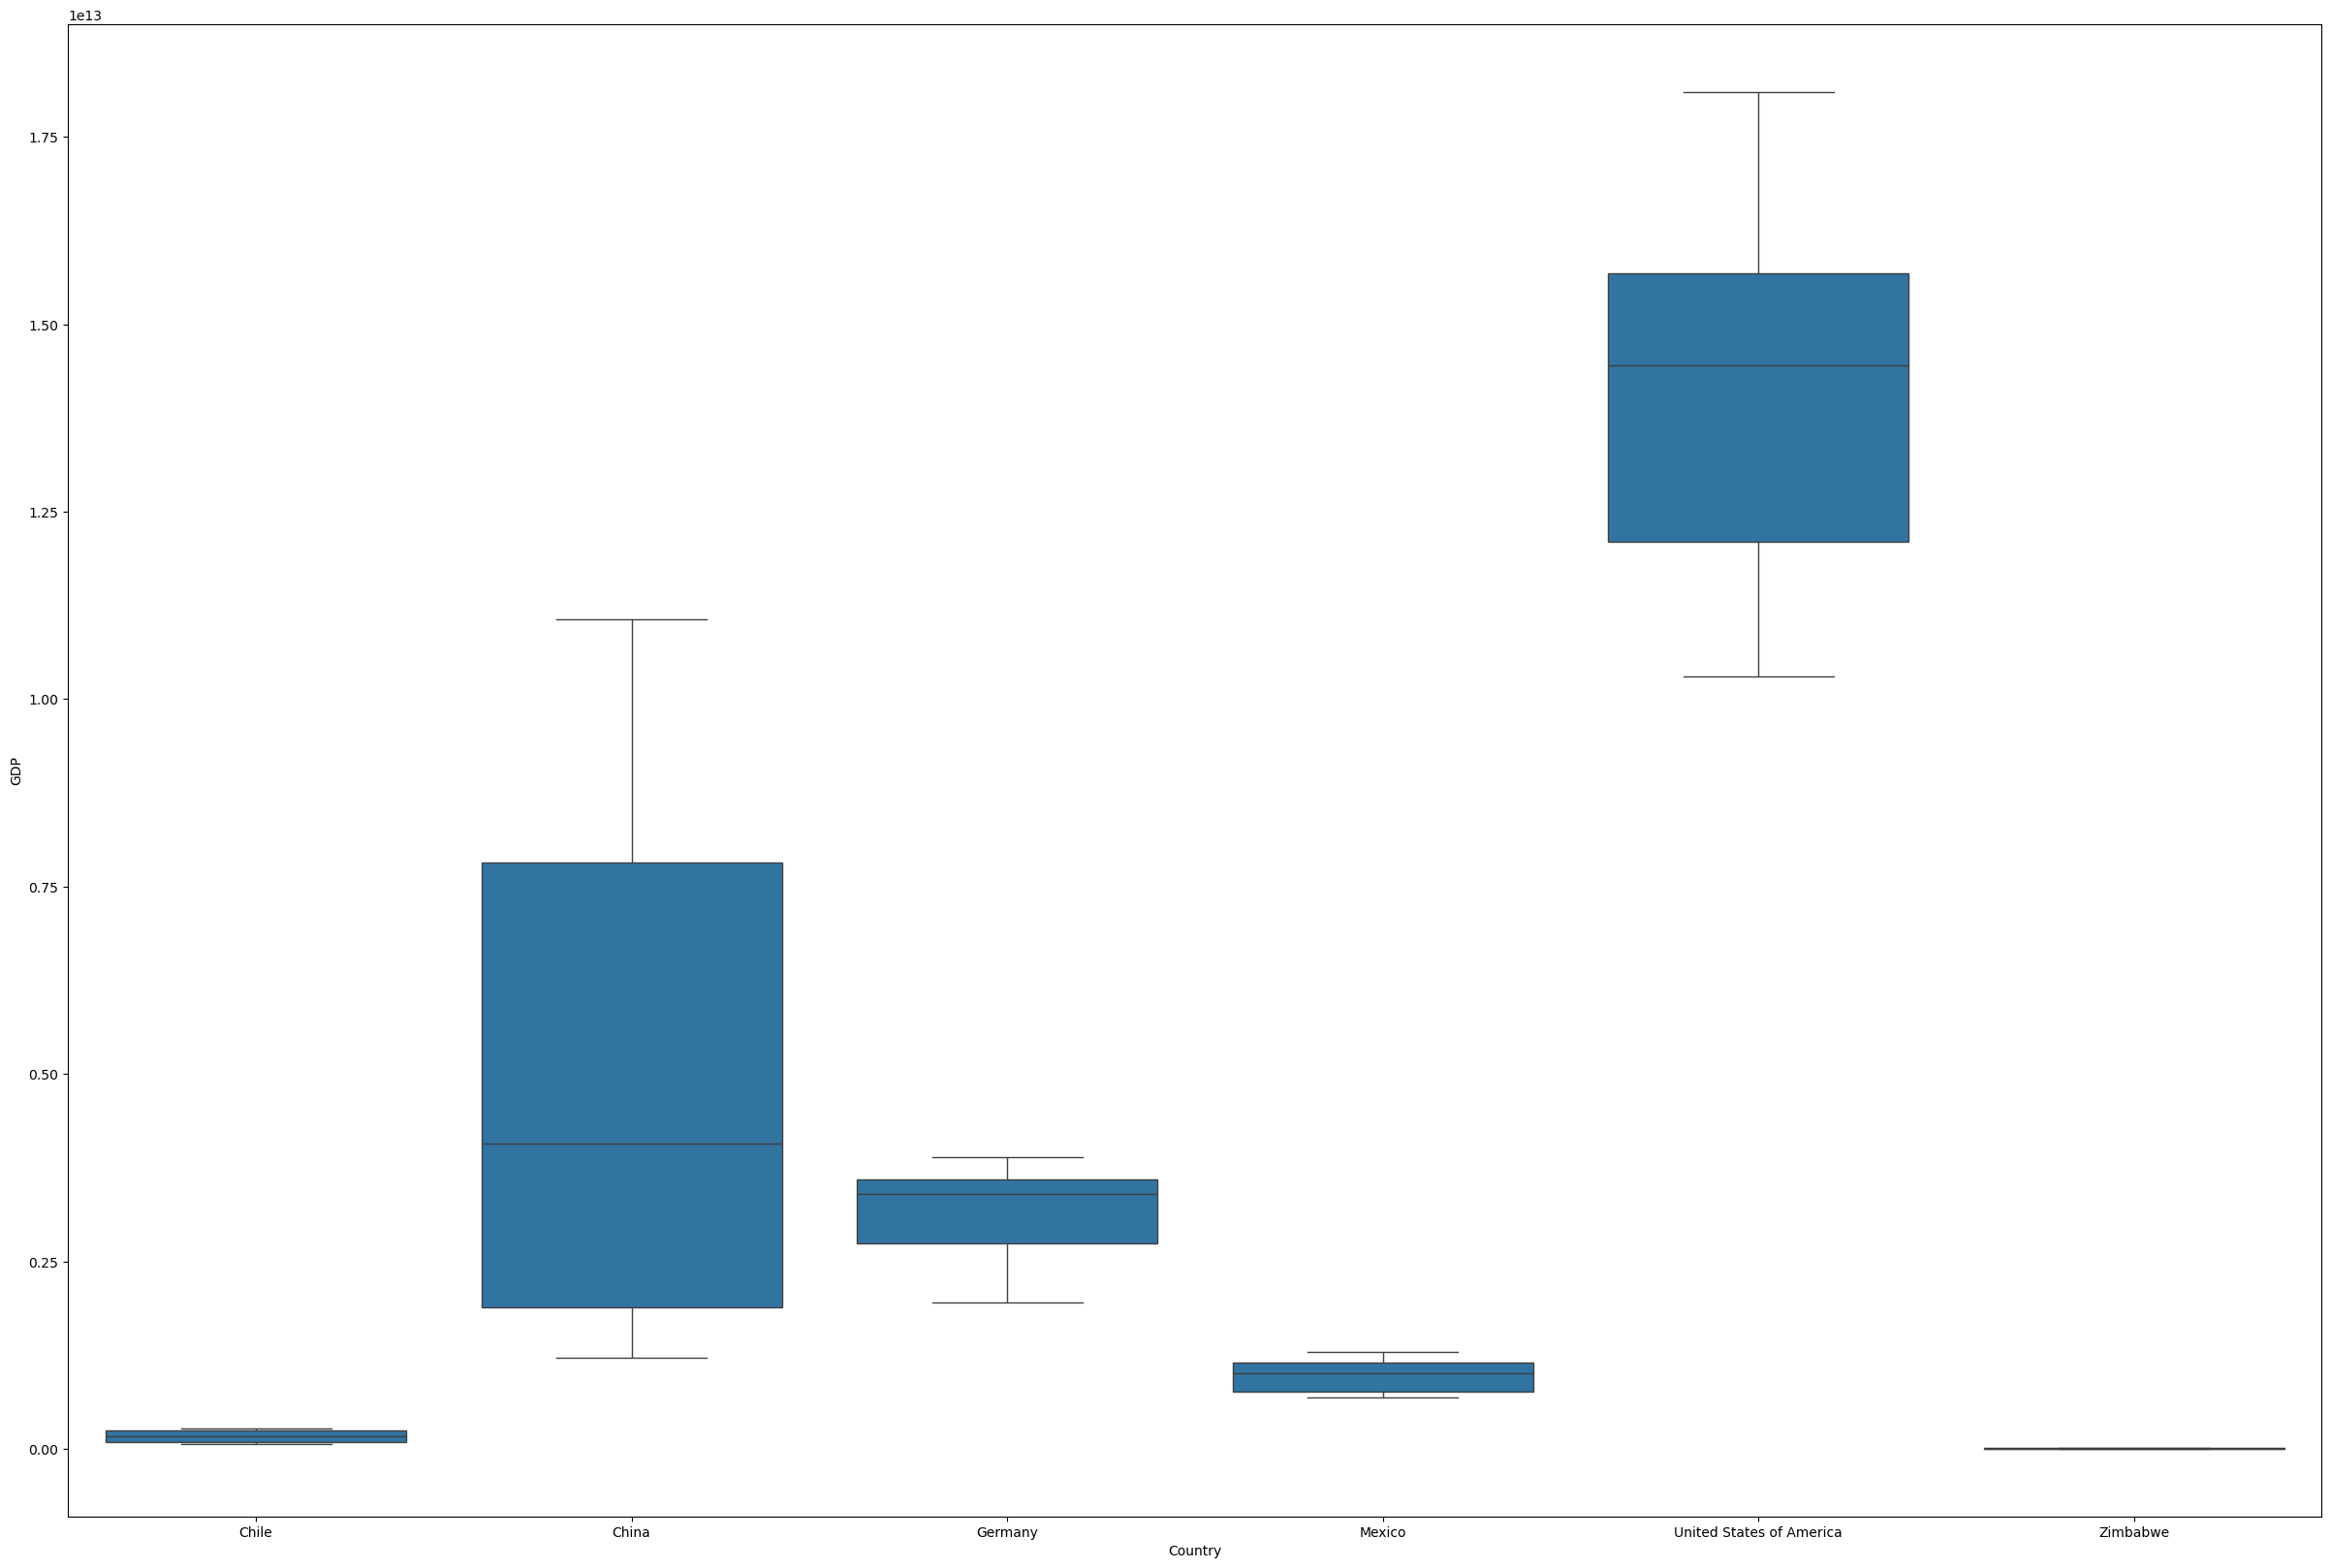

<Figure size 640x480 with 0 Axes>

In [8]:
# GDP distribution per country
draw_boxplot(df, 'Country', 'GDP')

Here we notice that USA is far above every country else in term of GDP from 2000 to 2015 (the scope of the study)
China is in the second palce next to Germany however, his variance is much greater. This may due to its rapid development.
We also see Chile an Zimbabwe far below everyone else.

# How does each country GDP evolve over time ?

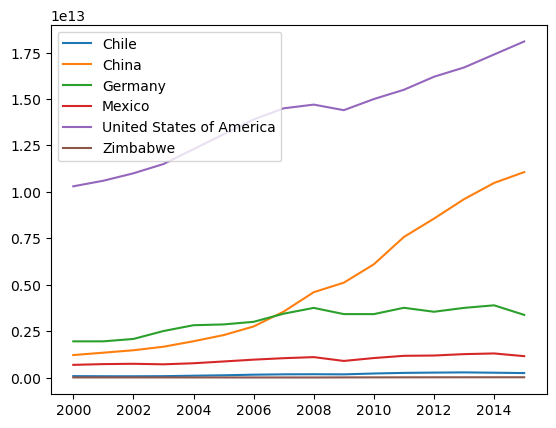

<Figure size 640x480 with 0 Axes>

In [11]:
# Evolution of GDP over time
draw_lineplot_per_country('GDP')

# Is a higher GDP correlate with higher LifeEx ?

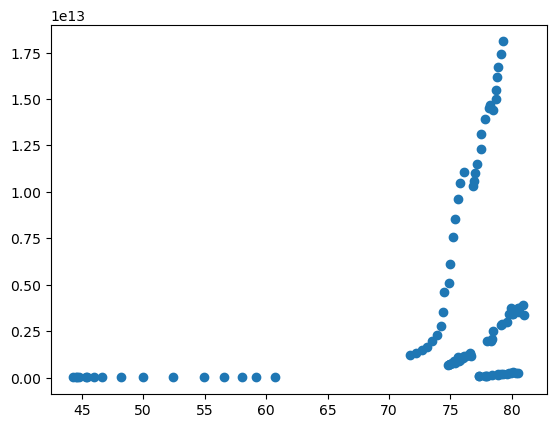

<Figure size 640x480 with 0 Axes>

In [13]:
# LifeEx vs GDP

plt.scatter(df.LifeEx, df.GDP)
plt.show()
plt.clf()

The result here is a little bit tricky to interpret. There is clearly a correlation between those 2 variables, however, it is not linear but more of a logaritmic relation. The more the , also there is some data in the bottom right that may hint a difference in this relation between countries or another variable.

# How is the difference in LifeEx per country ?

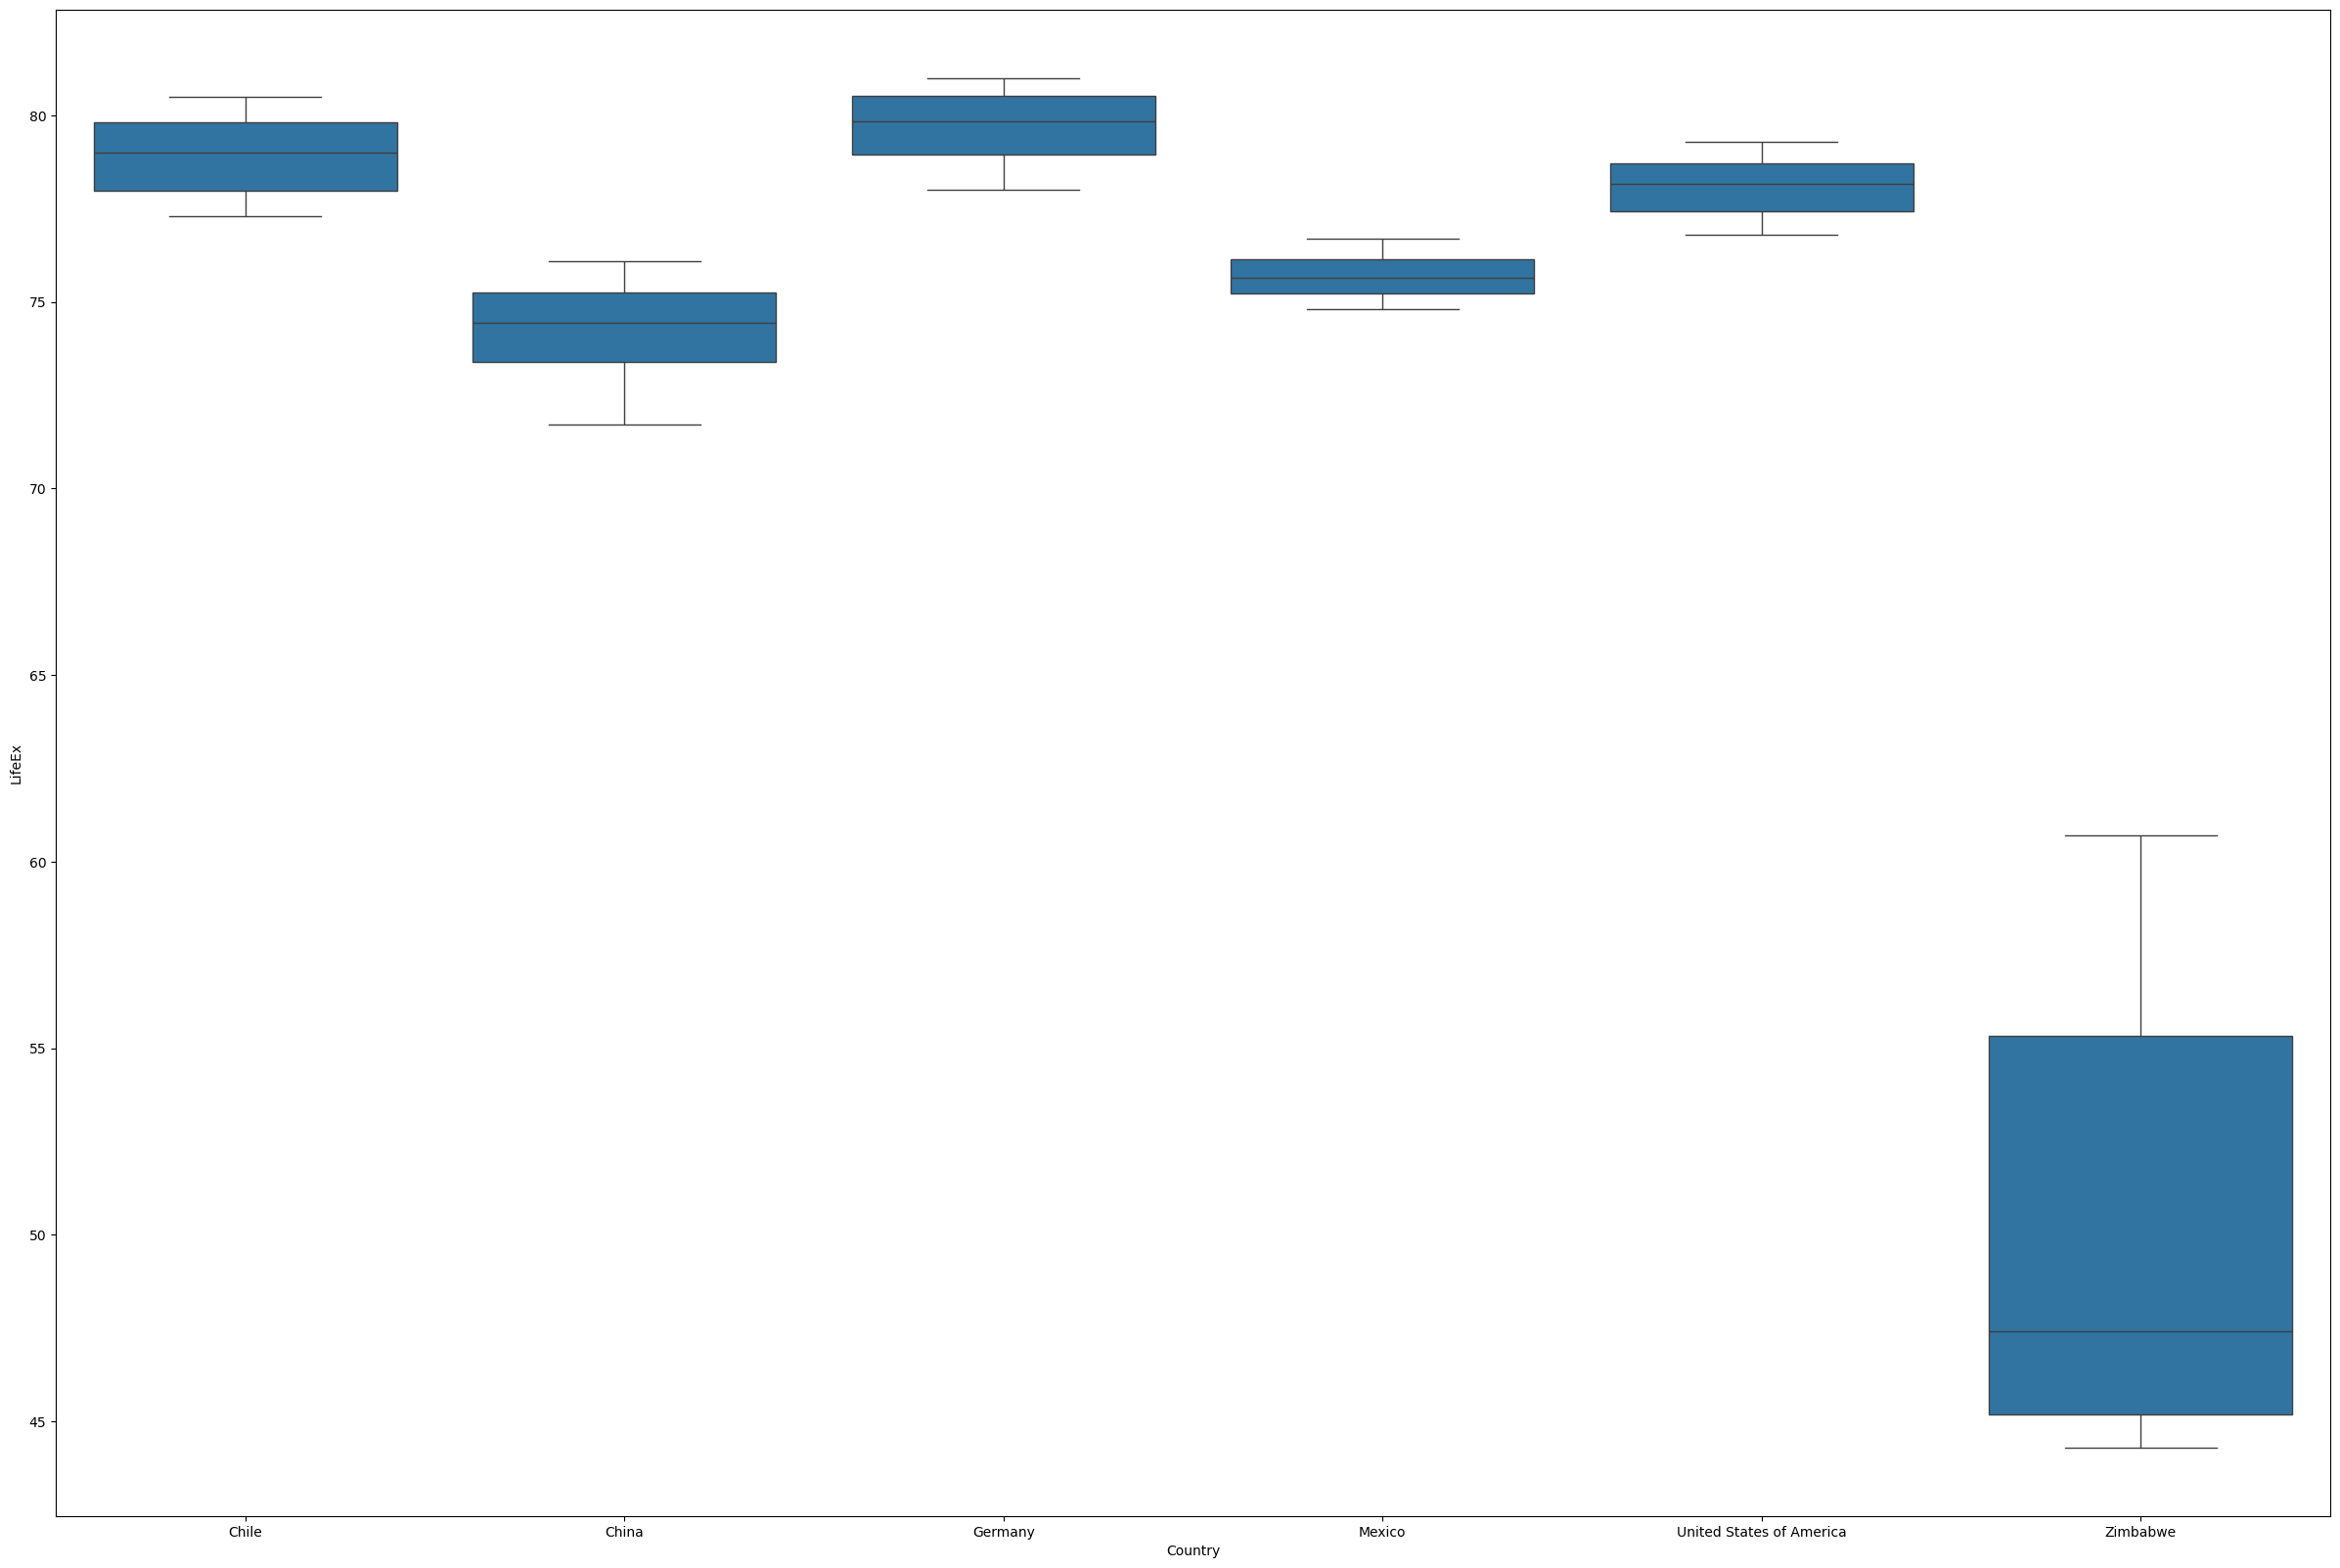

<Figure size 640x480 with 0 Axes>

In [16]:
# LifeEx per country
draw_boxplot(df, 'Country', 'LifeEx')

# How does each country LifeEx evolve over time ?

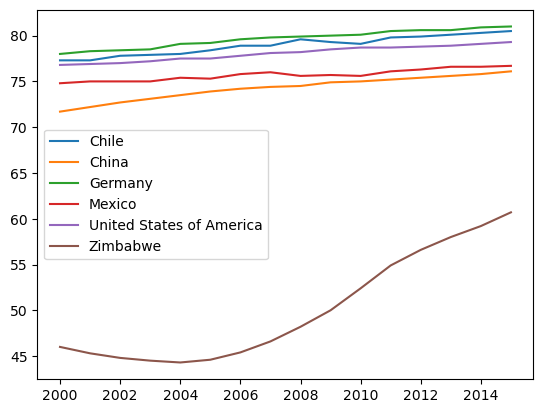

<Figure size 640x480 with 0 Axes>

In [18]:
# Evolution of LifeEx over time per country
draw_lineplot_per_country('LifeEx')

# Conclusion

- We see that life expectancy is correlated but not linearly to GDP, and we see that Zimbabwe has a lower life expectancy rate.
- We have hypothesis that this low rate is due to high infantile mortality although we need more data to support our belief.